In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score,cross_val_predict, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import cm
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, make_scorer, precision_score, recall_score, f1_score, classification_report,auc
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from collections import Counter
import itertools


download dataset ->  https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3

In [2]:
df = pd.read_csv('../creditcard.csv')

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
a= df['Class']==1
b= df['Class']==0
print("Jumlah kelas Fraud= ",a.sum())
print("Jumlah kelas non-fraud=", b.sum())

Jumlah kelas Fraud=  492
Jumlah kelas non-fraud= 284315


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.isnull().sum().max() #cari null value

0

In [7]:
df.columns #liat ada kolum apa aja

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
#lihat isi data
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


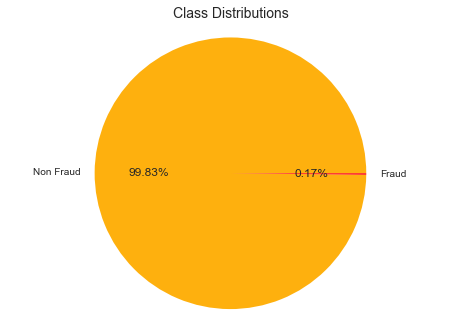

In [9]:
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.2f%%', labels=['Non Fraud','Fraud'], colors=['#FEB00E','r'])
plt.title('Class Distributions', fontsize=14)
plt.axis('equal')
plt.ylabel('')
plt.show()

Melihat jumlah dari data yang terkait dengan transaksi normal dan transaksi penipuan

### Melihat Distribusi

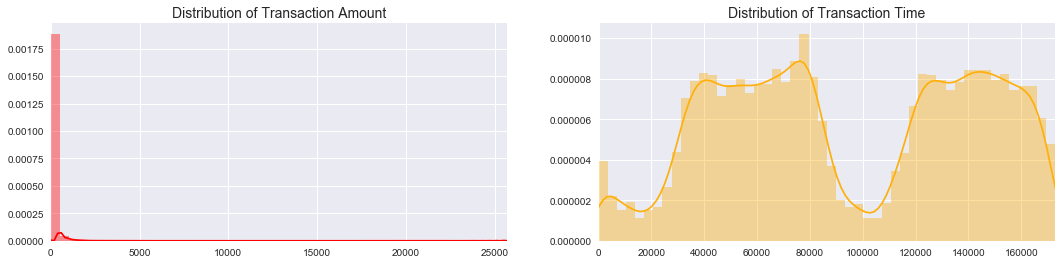

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df["Amount"].values
time_val = df["Time"].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='#FEB00E')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [11]:
rob_scaler = RobustScaler() #https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)


#setelah di scale
df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


scaled_amount dan scaled_time adalah kolom baru dengan nilai yang telah di _scale_. Ada 492 kasus penipuan dalam dataset, sehingga bisa mendapatkan 492 kasus non-fraud secara acak untuk membuat sub-data baru.

### Memisahkan Data

Pemisahan data dengan sub-sample atau data yang ingin dimbangkan sangat penting untuk tujuan pengujian. Menguji model dengan data asli dan data yang telah diimbangkan sangat perlu, untuk menyesuaikan model baik dengan data yang undersample dan oversampel (agar model bisa mendeteksi pola), dan mengujinya pada set pengujian asli.

In [1]:
X_test = df.drop('not_paid', axis=1)
y_test = df['not_paid']
X_train = df_train.drop('not_paid', axis=1)
y_train = df['not_paid']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#X_train & y_train data undersample 

for train_index, test_index in sss.split(X_ori, y_ori):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X_ori.iloc[train_index], X_ori.iloc[test_index]
    original_ytrain, original_ytest = y_ori.iloc[train_index], y_ori.iloc[test_index]

NameError: name 'df_test' is not defined

##### Cek Distribusi Label 

In [13]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Distribusi Label: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


Distribusi Label: 

[ 0.99827075  0.00172925]
[ 0.99827955  0.00172045]


In [408]:
def show_metrics(cm):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision      =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall         =     {:.3f}'.format(tp/(tp+fn)))
    print('Specificity    =     {:.3f}'.format(tp/(fp+tn)))
    print('F1_score       =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

# 1. Undersampling

## 1.1 Random Under Sampling

In [14]:
df = df.sample(frac=1)


fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])


new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
88895,2.436945,-0.262585,-2.173786,-1.417622,2.603449,0.368534,-1.270898,0.834731,-0.872661,0.984656,...,-0.030498,-0.119986,-0.263332,0.203009,0.049116,0.461980,-0.294061,-0.007528,-0.125090,0
15751,1.089779,-0.675584,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,...,1.649202,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,1
269528,31.680291,0.927936,-2.277286,-7.610063,-4.236749,2.384822,-2.154222,0.136204,3.144186,-0.870913,...,3.947605,1.091493,-1.393700,-1.985233,-0.263785,-0.470549,-0.732943,-0.428577,0.326388,0
212516,-0.307273,0.636779,-1.298443,1.948100,-4.509947,1.305805,-0.019486,-0.509238,-2.643398,1.283545,...,0.250415,1.178032,1.360989,-0.272013,-0.325948,0.290703,0.841295,0.643094,0.201156,1
8296,-0.293440,-0.864813,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,...,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1


Distribusi tiap kelas dalam subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64
1    492
0    492
Name: Class, dtype: int64


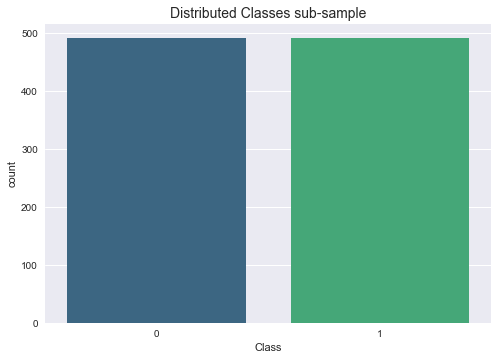

In [15]:
print('Distribusi tiap kelas dalam subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))
print(new_df['Class'].value_counts())


sns.countplot('Class', data=new_df, palette='viridis')
plt.title('Distributed Classes sub-sample', fontsize=14)
plt.show()

In [16]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [17]:
#Naive Bayes
clf = GaussianNB()
y_prednv = clf.fit(X_train, y_train).predict(original_Xtest)
conf_matrix_nv = confusion_matrix(original_ytest, y_prednv)


#LR
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

y_predlog = log_reg.fit(X_train, y_train).predict(original_Xtest)
conf_matrix_log_reg = confusion_matrix(original_ytest, y_predlog)

#KNN
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

y_predknn = knears_neighbors.fit(X_train, y_train).predict(original_Xtest)
conf_matrix_knn = confusion_matrix(original_ytest, y_predknn)


In [51]:
knears_neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

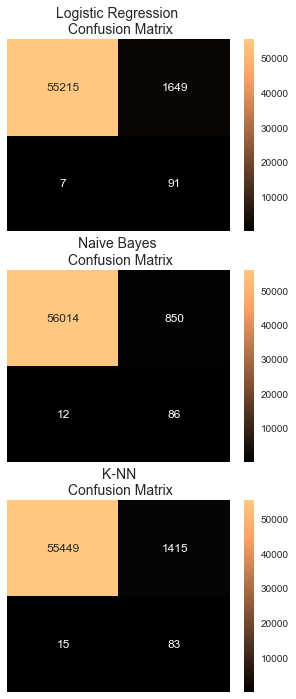

In [18]:
fig, ax = plt.subplots(3, 1,figsize=(5,12), squeeze=False)

sns.heatmap(conf_matrix_log_reg, ax=ax[0][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)

sns.heatmap(conf_matrix_knn, ax=ax[1][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[1, 0].set_title("Naive Bayes \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[1, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)

sns.heatmap(conf_matrix_nv, ax=ax[2][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[2, 0].set_title("K-NN\n Confusion Matrix", fontsize=14)
ax[2, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[2, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)
plt.show()

In [19]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()}

In [20]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, "Training Score of", round(training_score.mean(), 2) * 100, "% accuracy score")

LogisticRegression Training Score of 95.0 % accuracy score
KNeighborsClassifier Training Score of 94.0 % accuracy score
GaussianNB Training Score of 91.0 % accuracy score


In [21]:
#LR
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

#KNN
knn_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(knn_score.mean() * 100, 2).astype(str) + '%')


#NB
nvebayes_score = cross_val_score(clf, X_train, y_train, cv=5)
print('Naive Bayes Cross Validation Score', round(nvebayes_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.66%
Logistic Regression Cross Validation Score:  94.54%
Naive Bayes Cross Validation Score 90.98%


In [22]:
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")[:,1]
knn_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
nvebayes_pred = cross_val_predict(clf, X_train, y_train, cv=5)

In [118]:
print('NaiveBayes RUS Score:')
print(show_metrics(conf_matrix_nv))

print('')
print('Logistic Regression RUS Score:')
print(show_metrics(conf_matrix_log_reg))

print('')
print('KNN RUS Score:')
print(show_metrics(conf_matrix_knn))


NaiveBayes RUS Score:
Precision =     0.055
Recall    =     0.847
F1_score  =     0.104
None

Logistic Regression RUS Score:
Precision =     0.052
Recall    =     0.929
F1_score  =     0.099
None

KNN RUS Score:
Precision =     0.092
Recall    =     0.878
F1_score  =     0.166
None


In [23]:
print('NaiveBayes ROC-AUC Score: ', roc_auc_score(y_train, nvebayes_pred))
print('KNN ROC-AUC Score: ', roc_auc_score(y_train, knn_pred))
print('Logistic Regression ROC-AUC Score: ', roc_auc_score(y_train, log_reg_pred))

NaiveBayes ROC-AUC Score:  0.908257384784
KNN ROC-AUC Score:  0.944088940599
Logistic Regression ROC-AUC Score:  0.982418718893


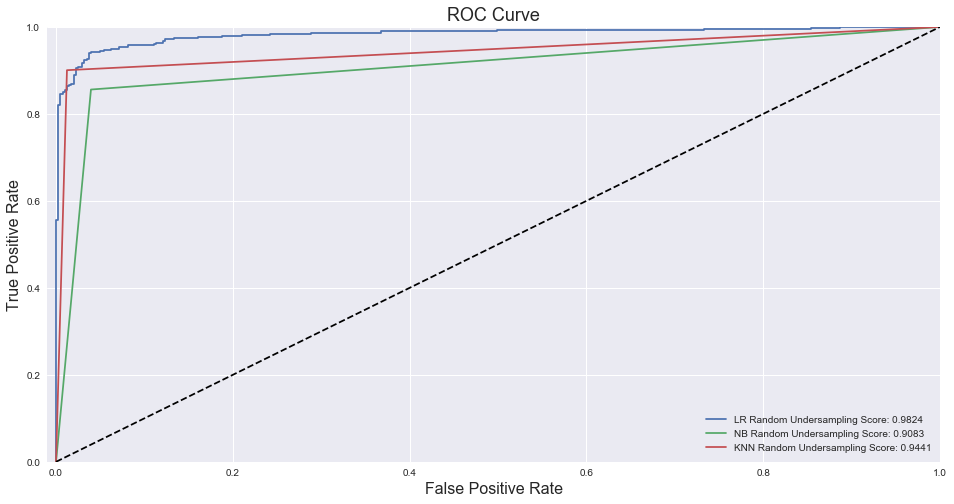

In [25]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
nb_fpr, nb_tpr, nb_thresold = roc_curve(y_train, nvebayes_pred)
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_train, knn_pred)

def graph_roc_curve(log_fpr, log_tpr, nb_fpr, nb_tpr, knn_fpr, knn_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='LR Random Undersampling Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(nb_fpr, nb_tpr, label='NB Random Undersampling Score: {:.4f}'.format(roc_auc_score(y_train, nvebayes_pred)))
    plt.plot(knn_fpr, knn_tpr, label='KNN Random Undersampling Score: {:.4f}'.format(roc_auc_score(y_train, knn_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
    plt.legend()
    
graph_roc_curve(log_fpr, log_tpr, nb_fpr, nb_tpr, knn_fpr, knn_tpr)
plt.show()

## 1.2 Tomek links

In [85]:
X_syn, y_syn = shuffle(original_Xtrain, original_ytrain)

In [86]:
#http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/under-sampling/plot_tomek_links.html#sphx-glr-auto-examples-under-sampling-plot-tomek-links-py
tl = TomekLinks(return_indices=True)
X_resampled, y_resampled, idx_resampled = tl.fit_sample(X_syn, y_syn)
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [27]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

for key, classifier in classifiers.items():
    classifier.fit(X_syn_train, y_syn_train)
    training_score = cross_val_score(classifier, X_syn_train, y_syn_train, cv=5)
    print(classifier.__class__.__name__, "Training Score of", round(training_score.mean(), 2) * 100, "% accuracy score")

LogisticRegression Training Score of 100.0 % accuracy score
KNeighborsClassifier Training Score of 100.0 % accuracy score
GaussianNB Training Score of 98.0 % accuracy score


In [87]:
tl = TomekLinks(return_indices=True)
X_traintl, y_traintl, idx_resampled = tl.fit_sample(original_Xtrain, original_ytrain)


In [177]:
print('Original dataset shape {}'.format(Counter(y_ori))) 
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 227432, 1: 394})


In [89]:
#Naive Bayes- TL
clf_tl = GaussianNB()
y_prednv_tl = clf_tl.fit(X_traintl, y_traintl).predict(original_Xtest)


In [94]:
#LR TL
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_regtl = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_regtl.fit(X_traintl, y_traintl)

log_reg_tl = grid_log_regtl.best_estimator_
y_predlog_tl = log_reg_tl.fit(X_traintl, y_traintl).predict(original_Xtest)

In [91]:
#KNN TL
#knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#grid_knears_tl = GridSearchCV(KNeighborsClassifier(), knears_params)
#grid_knears_tl.fit(X_traintl, y_traintl)
#knears_neighbors_tl = grid_knears.best_estimator_
knears_neighbors_tl= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')
y_predknn_tl = knears_neighbors_tl.fit(X_traintl, y_traintl).predict(original_Xtest)
conf_matrix_knn_tl = confusion_matrix(original_ytest, y_predknn_tl)

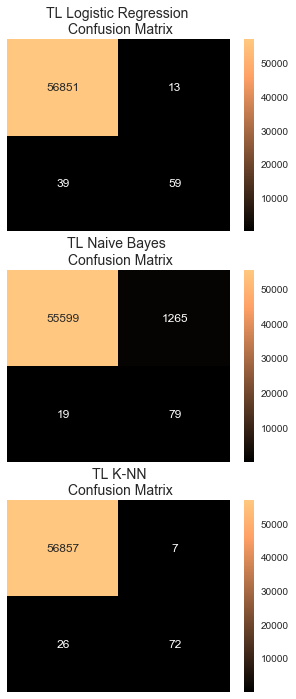

In [95]:
conf_matrix_nv_tl = confusion_matrix(original_ytest, y_prednv_tl)
conf_matrix_log_tl = confusion_matrix(original_ytest, y_predlog_tl)
conf_matrix_knn_tl = confusion_matrix(original_ytest, y_predknn_tl)

fig, ax = plt.subplots(3, 1,figsize=(5,12), squeeze=False)

sns.heatmap(conf_matrix_log_tl, ax=ax[0][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[0, 0].set_title("TL Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)

sns.heatmap(conf_matrix_nv_tl, ax=ax[1][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[1, 0].set_title("TL Naive Bayes \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[1, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)

sns.heatmap(conf_matrix_knn_tl, ax=ax[2][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[2, 0].set_title("TL K-NN\n Confusion Matrix", fontsize=14)
ax[2, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[2, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)
plt.show()

In [119]:
log_reg_pred_tl = cross_val_predict(log_reg_tl, X_traintl, y_traintl, cv=5, method="decision_function")[:,1]
nvebayes_pred_tl = cross_val_predict(clf_tl, X_traintl, y_traintl, cv=5)
knn_pred_tl = cross_val_predict(knears_neighbors_tl, X_traintl, y_traintl, cv=5)

print('NaiveBayes ROC-AUC Score: ', roc_auc_score(y_traintl, nvebayes_pred_tl))
print('Logistic Regression ROC-AUC Score: ', roc_auc_score(y_traintl, log_reg_pred_tl))
print('KNN ROC-AUC Score: ', roc_auc_score(y_traintl, knn_pred_tl))

NaiveBayes ROC-AUC Score:  0.906975474836
Logistic Regression ROC-AUC Score:  0.97433704957
KNN ROC-AUC Score:  0.870527597204


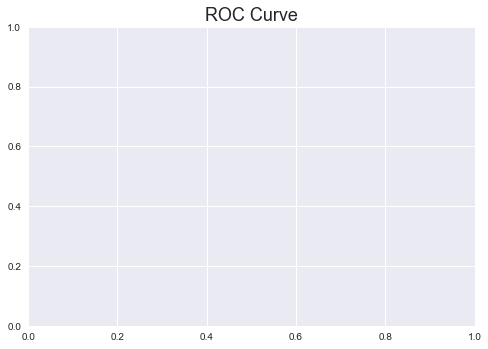

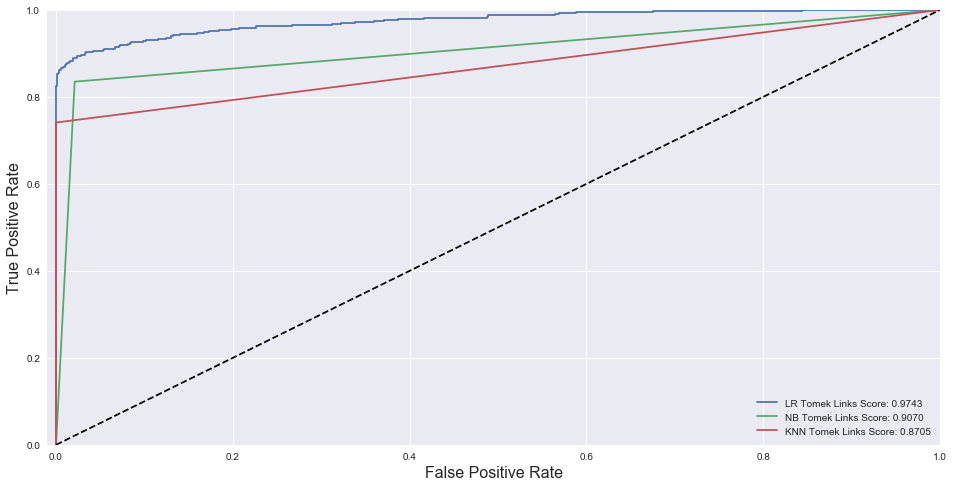

In [131]:
log_fpr_tl, log_tpr_tl, log_thresold_tl = roc_curve(y_traintl, log_reg_pred_tl)
nb_fpr_tl, nb_tpr_tl, nb_thresold_tl = roc_curve(y_traintl, nvebayes_pred_tl)
knn_fpr_tl, knn_tpr_tl, knn_thresold_tl = roc_curve(y_traintl, knn_pred_tl)

def graph_roc_curve(log_fpr_tl, log_tpr_tl, nb_fpr_tl, nb_tpr_tl, knn_fpr_tl, knn_tpr_tl):
    plt.title('ROC Curve', fontsize=18)
    plt.figure(figsize=(16,8))
    plt.plot(log_fpr_tl, log_tpr_tl, label='LR Tomek Links Score: {:.4f}'.format(roc_auc_score(y_traintl, log_reg_pred_tl)))
    plt.plot(nb_fpr_tl, nb_tpr_tl, label='NB Tomek Links Score: {:.4f}'.format(roc_auc_score(y_traintl, nvebayes_pred_tl)))
    plt.plot(knn_fpr_tl, knn_tpr_tl, label='KNN Tomek Links Score: {:.4f}'.format(roc_auc_score(y_traintl, knn_pred_tl)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve(log_fpr_tl, log_tpr_tl, nb_fpr_tl, nb_tpr_tl, knn_fpr_tl, knn_tpr_tl)
plt.show()

# 2. Oversampling

## 2.1 SMOTE

Cross Validating dahulu...

In [28]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(), rand_log_reg)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_list.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_list.append(precision_score(original_ytrain[test], prediction))
    recall_list.append(recall_score(original_ytrain[test], prediction))
    f1_list.append(f1_score(original_ytrain[test], prediction))
    auc_list.append(roc_auc_score(original_ytrain[test], prediction))

In [29]:
print("accuracy-SMOTE : {}".format(np.mean(accuracy_list)))
print("precision: {}".format(np.mean(precision_list)))
print("recall: {}".format(np.mean(recall_list)))
print("f1: {}".format(np.mean(f1_list)))

accuracy: 0.9778884768153789
precision: 0.06485951892661135
recall: 0.8759493670886076
f1: 0.1207689879875931


Setelah cross validation, lanjut ke SMOTE dengan di fitting ke Logistic regression dan Naive bayes

In [156]:
sm = SMOTE(ratio='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain) #http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.SMOTE.html

In [152]:
#NB- SMOTE
clf_sm = GaussianNB()
y_pred_nvebayes_sm = clf_sm.fit(Xsm_train, ysm_train).predict(original_Xtest)
conf_matrix_nv_sm= confusion_matrix(original_ytest, y_pred_nvebayes_sm)


In [59]:
#LR - SMOTE
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg_sm = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg_sm.fit(Xsm_train, ysm_train)
log_reg_sm = grid_log_reg.best_estimator_
y_predlog_sm = log_reg_sm.fit(Xsm_train, ysm_train).predict(original_Xtest)
conf_matrix_log_reg_sm = confusion_matrix(original_ytest, y_predlog_sm)


In [60]:
#KNN
#knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#grid_knears_sm = GridSearchCV(KNeighborsClassifier(), knears_params)
#grid_knears_sm.fit(Xsm_train, ysm_train)
#knears_neighbors_sm = grid_knears.best_estimator_
knears_neighbors_sm= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')
y_predknn_sm = knears_neighbors_sm.fit(Xsm_train, ysm_train).predict(original_Xtest)
conf_matrix_knn_sm = confusion_matrix(original_ytest, y_predknn_sm)

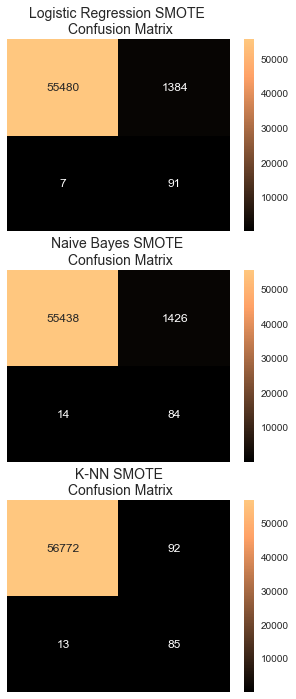

In [66]:
fig, ax = plt.subplots(3, 1,figsize=(5,12), squeeze=False)

sns.heatmap(conf_matrix_log_reg_sm, ax=ax[0][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression SMOTE \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)

sns.heatmap(conf_matrix_nv_sm, ax=ax[1][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[1, 0].set_title("Naive Bayes SMOTE \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[1, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)

sns.heatmap(conf_matrix_knn_sm, ax=ax[2][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[2, 0].set_title("K-NN SMOTE\n Confusion Matrix", fontsize=14)
ax[2, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[2, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)
plt.show()

In [31]:
 Xsm_coba, ysm_coba = smote_.fit_sample(X_ori,y_ori)

In [32]:
print('Original dataset shape {}'.format(Counter(y_ori))) 
print('Resampled SMOTE dataset shape {}'.format(Counter(ysm_coba)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled SMOTE dataset shape Counter({0: 284315, 1: 284315})


Penggunaan SMOTE, untuk membuat data yang lebih mirip sehingga model dapat menangkap pola. Namun data tes / data validasi dalam kasus ini tidak boleh di otak-atik disentuh. Tujuannya adalah melihat apakah model dapat memperoleh pola dengan lebih banyak informasi melalui SMOTE untuk mendeteksi kasus Fraud (yang sebenarnya) yang _not synthetic generated._

In [145]:
y_pred_nvebayes_sm.shape

(56962,)

In [164]:
log_reg_pred_sm = cross_val_predict(log_reg_sm, Xsm_train, ysm_train, cv=5, method="decision_function")[:,1]
nvebayes_pred_sm = cross_val_predict(clf_sm, Xsm_train, ysm_train, cv=5)
knn_pred_sm = cross_val_predict(knears_neighbors_sm, Xsm_train, ysm_train, cv=5)


print('NaiveBayes SMOTE ROC-AUC Score: ', roc_auc_score(ysm_train, nvebayes_pred_sm))
print('Logistic Regression SMOTE ROC-AUC Score: ', roc_auc_score(ysm_train, log_reg_pred_sm))
print('KNN SMOTE ROC-AUC Score: ', roc_auc_score(ysm_train, knn_pred_sm))


NaiveBayes SMOTE ROC-AUC Score:  0.912651516151
Logistic Regression SMOTE ROC-AUC Score:  0.98864590591
KNN SMOTE ROC-AUC Score:  0.99931413799


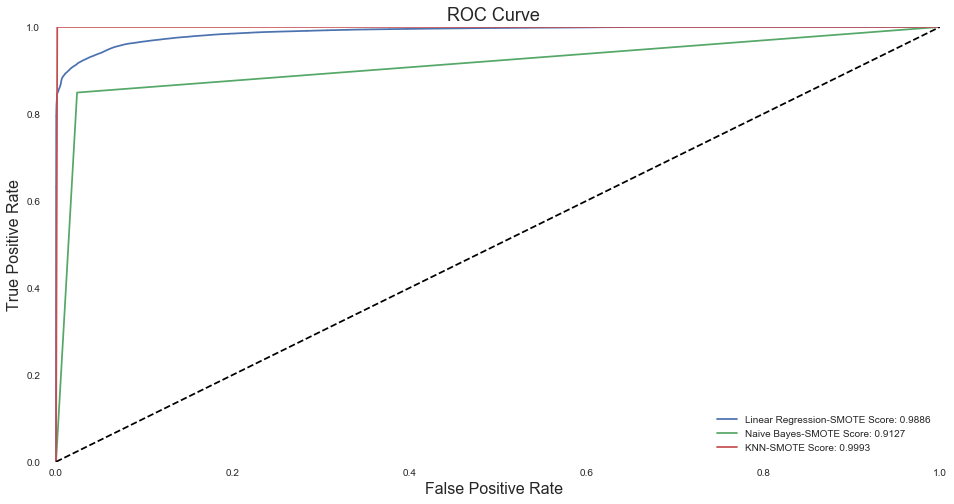

In [166]:
log_fpr_sm, log_tpr_sm, log_thresold_sm = roc_curve(ysm_train, log_reg_pred_sm)
nb_fpr_sm, nb_tpr_sm, nb_thresold_sm = roc_curve(ysm_train, nvebayes_pred_sm)
knn_fpr_sm, knn_tpr_sm, knn_thresold_sm = roc_curve(ysm_train, knn_pred_sm)

def graph_roc_curve(log_fpr_sm, log_tpr_sm, nb_fpr_sm, nb_tpr_sm, knn_fpr_sm, knn_tpr_sm):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr_sm, log_tpr_sm, label='Linear Regression-SMOTE Score: {:.4f}'.format(roc_auc_score(ysm_train, log_reg_pred_sm)))
    plt.plot( nb_fpr_sm, nb_tpr_sm, label='Naive Bayes-SMOTE Score: {:.4f}'.format(roc_auc_score(ysm_train, nvebayes_pred_sm)))
    plt.plot( knn_fpr_sm, knn_tpr_sm, label='KNN-SMOTE Score: {:.4f}'.format(roc_auc_score(ysm_train, knn_pred_sm)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
    plt.legend()
    
graph_roc_curve(log_fpr_sm, log_tpr_sm, nb_fpr_sm, nb_tpr_sm, knn_fpr_sm, knn_tpr_sm)

plt.rcParams['axes.facecolor']='white'
plt.show()


## 2.2 ADASYN

In [56]:
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_sample(original_Xtrain, original_ytrain) 
X_coba_ada, y_coba_ada = ada.fit_sample(X_ori, y_ori) 


In [57]:
print('Original dataset shape {}'.format(Counter(y_ori))) 
print('Resampled ADASYN dataset shape {}'.format(Counter(y_coba_ada)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled ADASYN dataset shape Counter({0: 284315, 1: 284297})


In [62]:
#NB- ADASYN
clf_ada = GaussianNB()
y_pred_nvebayes_ada = clf_ada.fit(X_train_ada, y_train_ada).predict(original_Xtest)
conf_matrix_nv_ada= confusion_matrix(original_ytest, y_pred_nvebayes_ada)


In [64]:
#LR ADASYN
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg_ada = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg_ada.fit(Xsm_train, ysm_train)
log_reg_ada = grid_log_reg.best_estimator_
y_predlog_ada = log_reg_ada.fit(X_train_ada, y_train_ada).predict(original_Xtest)
conf_matrix_log_reg_ada = confusion_matrix(original_ytest, y_predlog_ada)

In [75]:
#KNN -ADASYN
#knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#grid_knears_ada = GridSearchCV(KNeighborsClassifier(), knears_params)
#grid_knears_ada.fit(X_train_ada, y_train_ada)
#knears_neighbors_ada = grid_knears.best_estimator_
knears_neighbors_ada= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')
y_predknn_ada = knears_neighbors_ada.fit(X_train_ada, y_train_ada).predict(original_Xtest)
conf_matrix_knn_ada = confusion_matrix(original_ytest, y_predknn_ada)

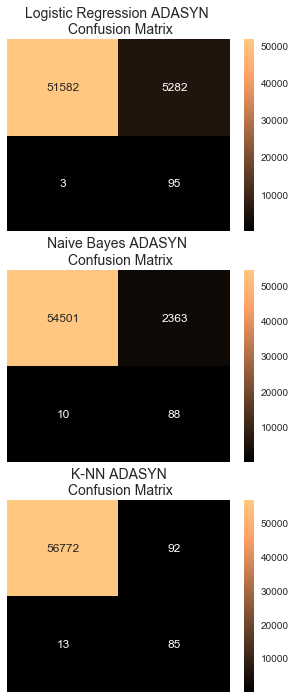

In [255]:
conf_matrix_nv_ada= confusion_matrix(original_ytest, y_pred_nvebayes_ada)
conf_matrix_log_reg_ada = confusion_matrix(original_ytest, y_predlog_ada)
conf_matrix_knn_ada= confusion_matrix(original_ytest,y_predknn_ada)

fig, ax = plt.subplots(3, 1,figsize=(5,12), squeeze=False)

sns.heatmap(conf_matrix_log_reg_ada, ax=ax[0][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression ADASYN \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)

sns.heatmap(conf_matrix_nv_ada, ax=ax[1][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[1, 0].set_title("Naive Bayes ADASYN \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[1, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)

sns.heatmap(conf_matrix_knn_ada, ax=ax[2][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[2, 0].set_title("K-NN ADASYN\n Confusion Matrix", fontsize=14)
ax[2, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[2, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)
plt.show()

In [168]:
log_reg_pred_ada = cross_val_predict(log_reg_ada, X_train_ada, y_train_ada, cv=5, method="decision_function")[:,1]
nvebayes_pred_ada = cross_val_predict(clf_ada, X_train_ada, y_train_ada, cv=5)
knn_pred_ada = cross_val_predict(knears_neighbors_ada, X_train_ada, y_train_ada, cv=5)

print('NaiveBayes ROC-AUC Score: ', roc_auc_score(y_train_ada, log_reg_pred_ada))
print('Logistic Regression ROC-AUC Score: ', roc_auc_score(y_train_ada, nvebayes_pred_ada))
print('KNN ROC-AUC Score: ', roc_auc_score(y_train_ada, knn_pred_ada))

NaiveBayes ROC-AUC Score:  0.948751401752
Logistic Regression ROC-AUC Score:  0.711186639322
KNN ROC-AUC Score:  0.979562085528


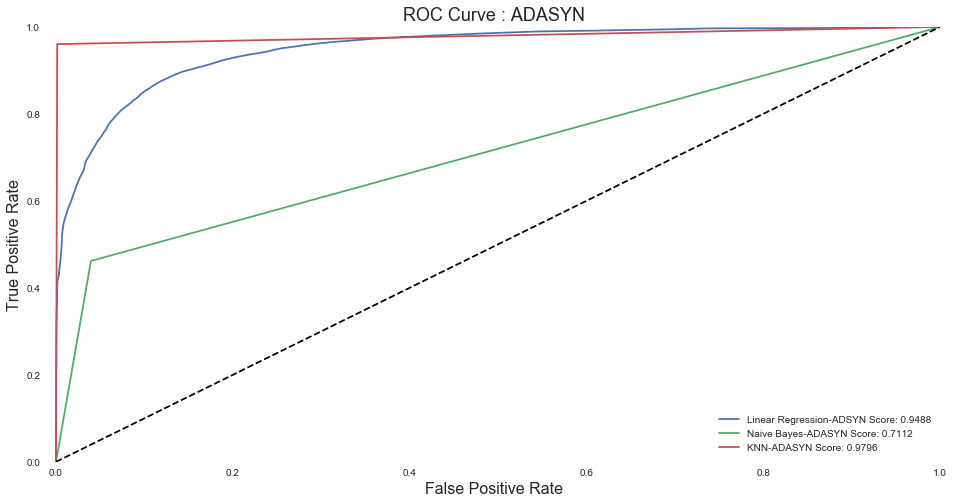

In [172]:
log_fpr_ada, log_tpr_ada, log_thresold_ada = roc_curve(y_train_ada, log_reg_pred_ada)
nb_fpr_ada, nb_tpr_ada, nb_thresold_ada = roc_curve(y_train_ada, nvebayes_pred_ada)
knn_fpr_ada, knn_tpr_ada, knn_thresold_ada = roc_curve(y_train_ada, knn_pred_ada)


def graph_roc_curve(log_fpr_ada, log_tpr_ada, nb_fpr_ada, nb_tpr_ada, knn_fpr_ada, knn_tpr_ada):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve : ADASYN', fontsize=18)
    plt.plot(log_fpr_ada, log_tpr_ada, label='Linear Regression-ADSYN Score: {:.4f}'.format(roc_auc_score(y_train_ada, log_reg_pred_ada)))
    plt.plot( nb_fpr_ada, nb_tpr_ada, label='Naive Bayes-ADASYN Score: {:.4f}'.format(roc_auc_score(y_train_ada, nvebayes_pred_ada)))
    plt.plot( knn_fpr_ada, knn_tpr_ada, label='KNN-ADASYN Score: {:.4f}'.format(roc_auc_score(y_train_ada, knn_pred_ada)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
    plt.legend()
    
graph_roc_curve(log_fpr_ada, log_tpr_ada, nb_fpr_ada, nb_tpr_ada, knn_fpr_ada, knn_tpr_ada)

plt.rcParams['axes.facecolor']='white'
plt.show() 

# 3. Original Data

In [68]:
#Naive Bayes Original Data
clf_ori = GaussianNB()
y_pred_ori_nv = clf_ori.fit(original_Xtrain,original_ytrain).predict(original_Xtest)


In [69]:
#Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg_ori = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg_ori.fit(original_Xtrain, original_ytrain)
log_reg_ori = grid_log_reg.best_estimator_
y_pred_ori_log = log_reg_ori.fit(original_Xtrain,original_ytrain).predict(original_Xtest)                                                       

In [73]:
#KNN -ORI
#knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#grid_knears_ori = GridSearchCV(KNeighborsClassifier(), knears_params)
#grid_knears_ori.fit(original_Xtrain, original_ytrain)
#knears_neighbors_ori = grid_knears.best_estimator_
knears_neighbors_ori= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')
y_predknn_ori = knears_neighbors_ori.fit(original_Xtrain,original_ytrain).predict(original_Xtest)
conf_matrix_knn_ori = confusion_matrix(original_ytest, y_predknn_ori)

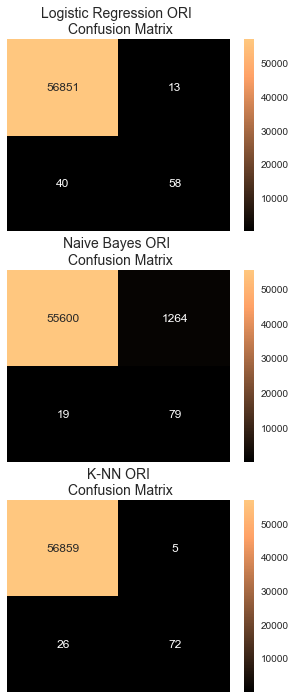

In [174]:
#confusion matric original data
conf_matrix_nv_ori = confusion_matrix(original_ytest, y_pred_ori_nv)
conf_matrix_log_ori = confusion_matrix(original_ytest, y_pred_ori_log)
conf_matrix_knn_ada = confusion_matrix(original_ytest, y_predknn_ori)



fig, ax = plt.subplots(3, 1,figsize=(5,12), squeeze=False)

sns.heatmap(conf_matrix_log_ori, ax=ax[0][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression ORI \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)

sns.heatmap(conf_matrix_nv_ori, ax=ax[1][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[1, 0].set_title("Naive Bayes ORI \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[1, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)

sns.heatmap(conf_matrix_knn_ori, ax=ax[2][0], annot=True,fmt='.0f', cmap=plt.cm.copper)
ax[2, 0].set_title("K-NN ORI\n Confusion Matrix", fontsize=14)
ax[2, 0].set_xticklabels(['', ''], fontsize=20, rotation=90)
ax[2, 0].set_yticklabels(['', ''], fontsize=20, rotation=360)
plt.show()

In [175]:
log_reg_pred_ori = cross_val_predict(log_reg,original_Xtrain,original_ytrain, cv=5, method="decision_function")[:,1]
nvebayes_pred_ori = cross_val_predict(clf, original_Xtrain,original_ytrain, cv=5)
knn_pred_ori = cross_val_predict(knears_neighbors_ori, original_Xtrain,original_ytrain, cv=5)

print('NaiveBayes ROC-AUC Score: ', roc_auc_score(original_ytrain, log_reg_pred_ori))
print('Logistic Regression ROC-AUC Score: ', roc_auc_score(original_ytrain, nvebayes_pred_ori))
print('KNN ROC-AUC Score: ', roc_auc_score(original_ytrain, knn_pred_ori))

NaiveBayes ROC-AUC Score:  0.975111022406
Logistic Regression ROC-AUC Score:  0.906963165403
KNN ROC-AUC Score:  0.870521004948


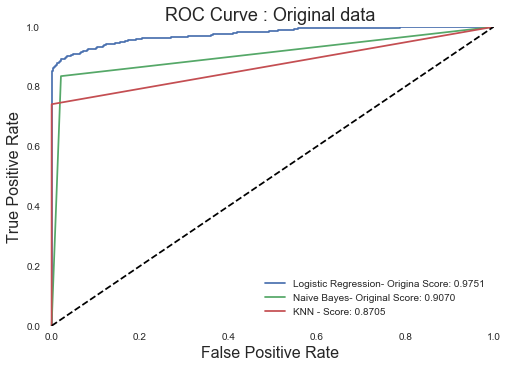

In [176]:
log_fpr_ori, log_tpr_ori, log_thresold_ori = roc_curve(original_ytrain, log_reg_pred_ori)
nb_fpr_ori, nb_tpr_ori, nb_thresold_ori = roc_curve(original_ytrain, nvebayes_pred_ori)
knn_fpr_ori, knn_tpr_ori, knn_thresold_ori = roc_curve(original_ytrain, knn_pred_ori)

def graph_roc_curve(log_fpr_ori, log_tpr_ori, nb_fpr_ori, nb_tpr_ori, knn_fpr_ori, knn_tpr_ori):
    plt.title('ROC Curve : Original data', fontsize=18)
    
    plt.plot(log_fpr_ori, log_tpr_ori, label='Logistic Regression- Origina Score: {:.4f}'.format(roc_auc_score(original_ytrain, log_reg_pred_ori)))
    plt.plot(nb_fpr_ori, nb_tpr_ori, label='Naive Bayes- Original Score: {:.4f}'.format(roc_auc_score(original_ytrain, nvebayes_pred_ori)))
    plt.plot(knn_fpr_ori, knn_tpr_ori, label='KNN - Score: {:.4f}'.format(roc_auc_score(original_ytrain, knn_pred_ori)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
    plt.legend()
    
graph_roc_curve(log_fpr_ori, log_tpr_ori, nb_fpr_ori, nb_tpr_ori,  knn_fpr_ori, knn_tpr_ori)
plt.show()

In [ ]:
log_reg = grid_log_reg.best_estimator_


ori_score = accuracy_score(original_ytest, y_pred_ori_log)
print("Linear Regession Original data accuracy: %.2f%%"%(100 *ori_score))

y_pred_nv_tl = clf.fit(X_traintl, y_traintl).predict(original_Xtest)
ori_score_nv = accuracy_score(original_ytest, y_pred_ori_nv)
print("Naive Bayes: %.2f%% " %(100 *ori_score_nv))

# 4. Akurasi

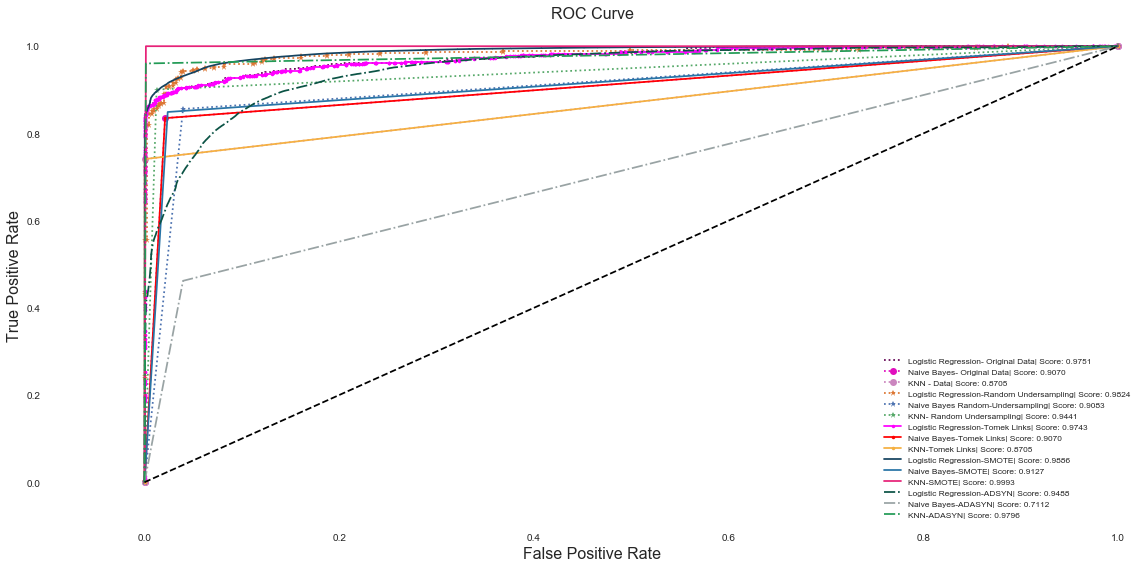

In [356]:
log_fpr_ori, log_tpr_ori, log_thresold_ori = roc_curve(original_ytrain, log_reg_pred_ori)
nb_fpr_ori, nb_tpr_ori, nb_thresold_ori = roc_curve(original_ytrain, nvebayes_pred_ori)
knn_fpr_ori, knn_tpr_ori, knn_thresold_ori = roc_curve(original_ytrain, knn_pred_ori)


log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
nb_fpr, nb_tpr, nb_thresold = roc_curve(y_train, nvebayes_pred)
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_train, knn_pred)

log_fpr_tl, log_tpr_tl, log_thresold_tl = roc_curve(y_traintl, log_reg_pred_tl)
nb_fpr_tl, nb_tpr_tl, nb_thresold_tl = roc_curve(y_traintl, nvebayes_pred_tl)
knn_fpr_tl, knn_tpr_tl, knn_thresold_tl = roc_curve(y_traintl, knn_pred_tl)

log_fpr_sm, log_tpr_sm, log_thresold_sm = roc_curve(ysm_train, log_reg_pred_sm)
nb_fpr_sm, nb_tpr_sm, nb_thresold_sm = roc_curve(ysm_train, nvebayes_pred_sm)
knn_fpr_sm, knn_tpr_sm, knn_thresold_sm = roc_curve(ysm_train, knn_pred_sm)

log_fpr_ada, log_tpr_ada, log_thresold_ada = roc_curve(y_train_ada, log_reg_pred_ada)
nb_fpr_ada, nb_tpr_ada, nb_thresold_ada = roc_curve(y_train_ada, nvebayes_pred_ada)
knn_fpr_ada, knn_tpr_ada, knn_thresold_ada = roc_curve(y_train_ada, knn_pred_ada)

def graph_roc_curve(log_fpr_ori, log_tpr_ori, nb_fpr_ori, nb_tpr_ori, knn_fpr_ori, knn_tpr_ori,
                    log_fpr, log_tpr, nb_fpr, nb_tpr, knn_fpr, knn_tpr,
                    log_fpr_tl, log_tpr_tl, nb_fpr_tl, nb_tpr_tl, knn_fpr_tl, knn_tpr_tl,
                   log_fpr_sm, log_tpr_sm, nb_fpr_sm, nb_tpr_sm, knn_fpr_sm, knn_tpr_sm,
                   log_fpr_ada, log_tpr_ada, nb_fpr_ada, nb_tpr_ada, knn_fpr_ada, knn_tpr_ada):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=16)
    
    plt.plot(log_fpr_ori, log_tpr_ori,  linestyle=':',color='#650555', label='Logistic Regression- Original Data| Score: {:.4f}'.format(roc_auc_score(original_ytrain, log_reg_pred_ori)))
    plt.plot(nb_fpr_ori, nb_tpr_ori, linestyle=':', marker='o',color='#E10EBE',label='Naive Bayes- Original Data| Score: {:.4f}'.format(roc_auc_score(original_ytrain, nvebayes_pred_ori)))
    plt.plot(knn_fpr_ori, knn_tpr_ori,linestyle=':', marker='o',color='#CB86BF',label='KNN - Data| Score: {:.4f}'.format(roc_auc_score(original_ytrain, knn_pred_ori)))
    
    plt.plot(log_fpr, log_tpr,color='#DC7633' ,linestyle=':',marker='*',label='Logistic Regression-Random Undersampling| Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(nb_fpr, nb_tpr, linestyle=':',marker='*',label='Naive Bayes Random-Undersampling| Score: {:.4f}'.format(roc_auc_score(y_train, nvebayes_pred)))
    plt.plot(knn_fpr, knn_tpr, linestyle=':',marker='*',label='KNN- Random Undersampling| Score: {:.4f}'.format(roc_auc_score(y_train, knn_pred)))
    
    plt.plot(log_fpr_tl, log_tpr_tl, color='#FF00FF',marker='.', label='Logistic Regression-Tomek Links| Score: {:.4f}'.format(roc_auc_score(y_traintl, log_reg_pred_tl)))
    plt.plot(nb_fpr_tl, nb_tpr_tl, color='#FF0000',marker='.',label='Naive Bayes-Tomek Links| Score: {:.4f}'.format(roc_auc_score(y_traintl, nvebayes_pred_tl)))
    plt.plot(knn_fpr_tl, knn_tpr_tl, color='#F5B041',marker='.',label='KNN-Tomek Links| Score: {:.4f}'.format(roc_auc_score(y_traintl, knn_pred_tl)))
    
    plt.plot(log_fpr_sm, log_tpr_sm, color='#154360',label='Logistic Regression-SMOTE| Score: {:.4f}'.format(roc_auc_score(ysm_train, log_reg_pred_sm)))
    plt.plot( nb_fpr_sm, nb_tpr_sm,color='#2874A6',label='Naive Bayes-SMOTE| Score: {:.4f}'.format(roc_auc_score(ysm_train, nvebayes_pred_sm)))
    plt.plot( knn_fpr_sm, knn_tpr_sm, color= '#E62278',label='KNN-SMOTE| Score: {:.4f}'.format(roc_auc_score(ysm_train, knn_pred_sm)))
    
    plt.plot(log_fpr_ada, log_tpr_ada,color='#0B5345',linestyle='-.',marker='|',label='Logistic Regression-ADSYN| Score: {:.4f}'.format(roc_auc_score(y_train_ada, log_reg_pred_ada)))
    plt.plot( nb_fpr_ada, nb_tpr_ada,color='#99A3A4',linestyle='-.',label='Naive Bayes-ADASYN| Score: {:.4f}'.format(roc_auc_score(y_train_ada, nvebayes_pred_ada)))
    plt.plot( knn_fpr_ada, knn_tpr_ada,color='#239B56',linestyle='-.',label='KNN-ADASYN| Score: {:.4f}'.format(roc_auc_score(y_train_ada, knn_pred_ada)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1,1.02])
    plt.ylim([-0.1,1.05])
    #plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
    plt.legend(fontsize = 'small')
    

    
graph_roc_curve(log_fpr_ori, log_tpr_ori, nb_fpr_ori, nb_tpr_ori, knn_fpr_ori, knn_tpr_ori,
                log_fpr, log_tpr, nb_fpr, nb_tpr, knn_fpr, knn_tpr,
                log_fpr_tl, log_tpr_tl, nb_fpr_tl, nb_tpr_tl, knn_fpr_tl, knn_tpr_tl,
               log_fpr_sm, log_tpr_sm, nb_fpr_sm, nb_tpr_sm, knn_fpr_sm, knn_tpr_sm,
               log_fpr_ada, log_tpr_ada, nb_fpr_ada, nb_tpr_ada, knn_fpr_ada, knn_tpr_ada)


plt.subplots_adjust(wspace = 1, hspace = 1)
plt.tight_layout()
plt.rcParams['axes.facecolor']='white'
plt.rcParams["axes.edgecolor"] = "0"
plt.rcParams["axes.linewidth"]  = 
plt.show()
#plt.savefig("roc_.pdf", bbox_inches='tight', dpi = 1000)
#plt.savefig('roc_.png', dpi = 900)

In [370]:
def roc_curve_all_models () : 
    plt.figure(figsize=(16, 12))
    plt.plot(log_fpr_ori, log_tpr_ori, linewidth = 2, linestyle=':',color='#650555', label='Logistic Regression- Original Data| Score: {:.4f}'.format(roc_auc_score(original_ytrain, log_reg_pred_ori)))
    plt.plot(nb_fpr_ori, nb_tpr_ori,linewidth = 2,linestyle=':', marker='o',color='#E10EBE',label='Naive Bayes- Original Data| Score: {:.4f}'.format(roc_auc_score(original_ytrain, nvebayes_pred_ori)))
    plt.plot(knn_fpr_ori, knn_tpr_ori,linewidth = 2,linestyle=':', marker='o',color='#CB86BF',label='KNN - Data| Score: {:.4f}'.format(roc_auc_score(original_ytrain, knn_pred_ori)))
    
    plt.plot(log_fpr, log_tpr,color='#DC7633' ,linestyle=':',marker='*',label='Logistic Regression-Random Undersampling| Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(nb_fpr, nb_tpr, linestyle=':',marker='*',label='Naive Bayes Random-Undersampling| Score: {:.4f}'.format(roc_auc_score(y_train, nvebayes_pred)))
    plt.plot(knn_fpr, knn_tpr, linestyle=':',marker='*',label='KNN- Random Undersampling| Score: {:.4f}'.format(roc_auc_score(y_train, knn_pred)))
    
    plt.plot(log_fpr_tl, log_tpr_tl, color='#FF00FF',marker='.', label='Logistic Regression-Tomek Links| Score: {:.4f}'.format(roc_auc_score(y_traintl, log_reg_pred_tl)))
    plt.plot(nb_fpr_tl, nb_tpr_tl, color='#FF0000',marker='.',label='Naive Bayes-Tomek Links| Score: {:.4f}'.format(roc_auc_score(y_traintl, nvebayes_pred_tl)))
    plt.plot(knn_fpr_tl, knn_tpr_tl, color='#F5B041',marker='.',label='KNN-Tomek Links| Score: {:.4f}'.format(roc_auc_score(y_traintl, knn_pred_tl)))
    
    plt.plot(log_fpr_sm, log_tpr_sm, color='#154360',label='Logistic Regression-SMOTE| Score: {:.4f}'.format(roc_auc_score(ysm_train, log_reg_pred_sm)))
    plt.plot( nb_fpr_sm, nb_tpr_sm,color='#2874A6',label='Naive Bayes-SMOTE| Score: {:.4f}'.format(roc_auc_score(ysm_train, nvebayes_pred_sm)))
    plt.plot( knn_fpr_sm, knn_tpr_sm, color= '#E62278',label='KNN-SMOTE| Score: {:.4f}'.format(roc_auc_score(ysm_train, knn_pred_sm)))
    
    plt.plot(log_fpr_ada, log_tpr_ada,color='#0B5345',linestyle='-.',marker='|',label='Logistic Regression-ADSYN| Score: {:.4f}'.format(roc_auc_score(y_train_ada, log_reg_pred_ada)))
    plt.plot( nb_fpr_ada, nb_tpr_ada,color='#99A3A4',linestyle='-.',label='Naive Bayes-ADASYN| Score: {:.4f}'.format(roc_auc_score(y_train_ada, nvebayes_pred_ada)))
    plt.plot( knn_fpr_ada, knn_tpr_ada,color='#239B56',linestyle='-.',label='KNN-ADASYN| Score: {:.4f}'.format(roc_auc_score(y_train_ada, knn_pred_ada)))
    
    
    
    
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([-0.1,1.02])
    plt.ylim([-0.1,1.05])
    
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.rcParams["axes.edgecolor"] = "0"
    plt.rcParams["axes.linewidth"]  = 1
    #plt.savefig('6.roc.png')
    plt.show();

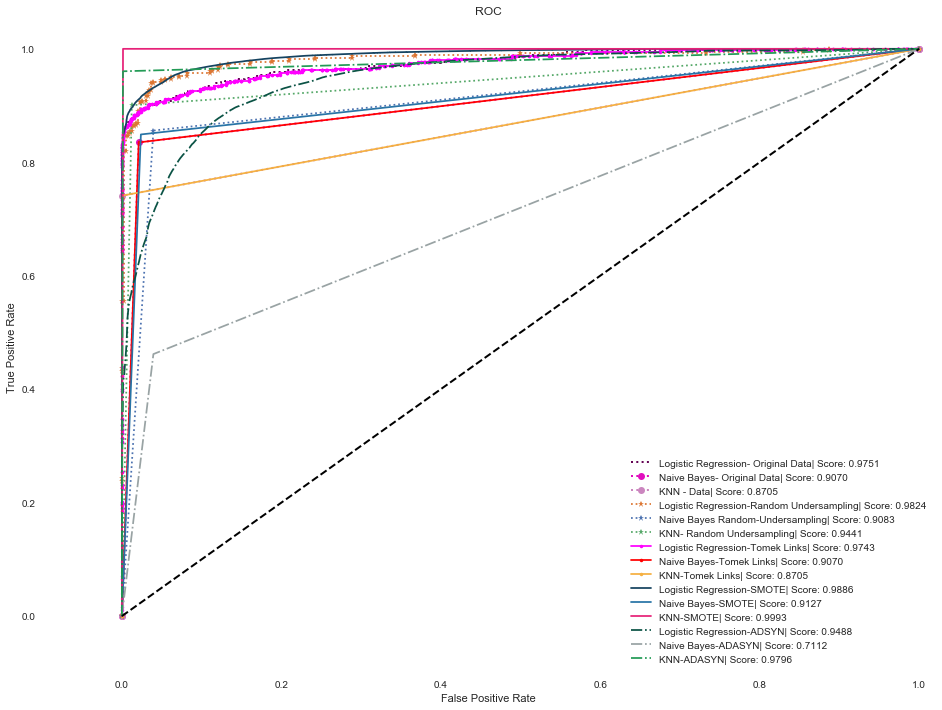

In [371]:
roc_curve_all_models ()

In [416]:
def roc_curve_all() : 
    
    plt.figure(figsize=(16, 12))
    
    plt.plot(log_fpr_ori, log_tpr_ori, linewidth = 2, linestyle=':',color='#650555', label='Logistic Regression- Original Data| Score: {:.4f}'.format(roc_auc_score(original_ytrain, log_reg_pred_ori)))
    plt.plot(nb_fpr_ori, nb_tpr_ori,linewidth = 2,linestyle=':', marker='o',color='#E10EBE',label='Naive Bayes- Original Data| Score: {:.4f}'.format(roc_auc_score(original_ytrain, nvebayes_pred_ori)))
    plt.plot(knn_fpr_ori, knn_tpr_ori,linewidth = 2,linestyle=':', marker='o',color='#CB86BF',label='KNN - Original Data| Score: {:.4f}'.format(roc_auc_score(original_ytrain, knn_pred_ori)))
    
    plt.plot(log_fpr, log_tpr,color='#DC7633',linewidth = 2,linestyle=':',marker='*',label='Logistic Regression-Random Undersampling| Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(nb_fpr, nb_tpr, linestyle=':', linewidth = 2,marker='*',label='Naive Bayes - Random Undersampling| Score: {:.4f}'.format(roc_auc_score(y_train, nvebayes_pred)))
    plt.plot(knn_fpr, knn_tpr, linestyle=':', linewidth = 2,marker='*',label='KNN- Random Undersampling| Score: {:.4f}'.format(roc_auc_score(y_train, knn_pred)))
    
    plt.plot(log_fpr_tl, log_tpr_tl, color='#FF00FF', linewidth = 2,marker='.', label='Logistic Regression-Tomek Links| Score: {:.4f}'.format(roc_auc_score(y_traintl, log_reg_pred_tl)))
    plt.plot(nb_fpr_tl, nb_tpr_tl, color='#FF0000', linewidth = 2,marker='.',label='Naive Bayes-Tomek Links| Score: {:.4f}'.format(roc_auc_score(y_traintl, nvebayes_pred_tl)))
    plt.plot(knn_fpr_tl, knn_tpr_tl, color='#F5B041', linewidth = 2,marker='.',label='KNN-Tomek Links| Score: {:.4f}'.format(roc_auc_score(y_traintl, knn_pred_tl)))
    
    plt.plot(log_fpr_sm, log_tpr_sm, color='#154360', linewidth = 2,label='Logistic Regression-SMOTE| Score: {:.4f}'.format(roc_auc_score(ysm_train, log_reg_pred_sm)))
    plt.plot( nb_fpr_sm, nb_tpr_sm,color='#2874A6', linewidth = 2,label='Naive Bayes-SMOTE| Score: {:.4f}'.format(roc_auc_score(ysm_train, nvebayes_pred_sm)))
    plt.plot( knn_fpr_sm, knn_tpr_sm, color= '#E62278', linewidth = 2,label='KNN-SMOTE| Score: {:.4f}'.format(roc_auc_score(ysm_train, knn_pred_sm)))
    
    plt.plot(log_fpr_ada, log_tpr_ada,color='#0B5345', linewidth = 2,linestyle='-.',marker='|',label='Logistic Regression-ADSYN| Score: {:.4f}'.format(roc_auc_score(y_train_ada, log_reg_pred_ada)))
    plt.plot( nb_fpr_ada, nb_tpr_ada,color='#99A3A4', linewidth = 2,linestyle='-.',label='Naive Bayes-ADASYN| Score: {:.4f}'.format(roc_auc_score(y_train_ada, nvebayes_pred_ada)))
    plt.plot( knn_fpr_ada, knn_tpr_ada,color='#239B56',linewidth = 2,linestyle='-.',label='KNN-ADASYN| Score: {:.4f}'.format(roc_auc_score(y_train_ada, knn_pred_ada)))
    
    
    
    legend_properties = {'weight':'bold'}

    plt.title('ROC Curve',fontsize=20)
    plt.legend(loc='lower right',shadow=True, fontsize='large', prop=legend_properties)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([-0.02,1.02])
    plt.ylim([-0.02,1.05])
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.savefig("roc_2.pdf", bbox_inches='tight', dpi = 1000)
    #plt.savefig('roc_2.png', dpi = 900, bbox_inches='tight')
    
    plt.rcParams["axes.edgecolor"] = "0"
    plt.rcParams["axes.linewidth"]  = 2
    plt.show()

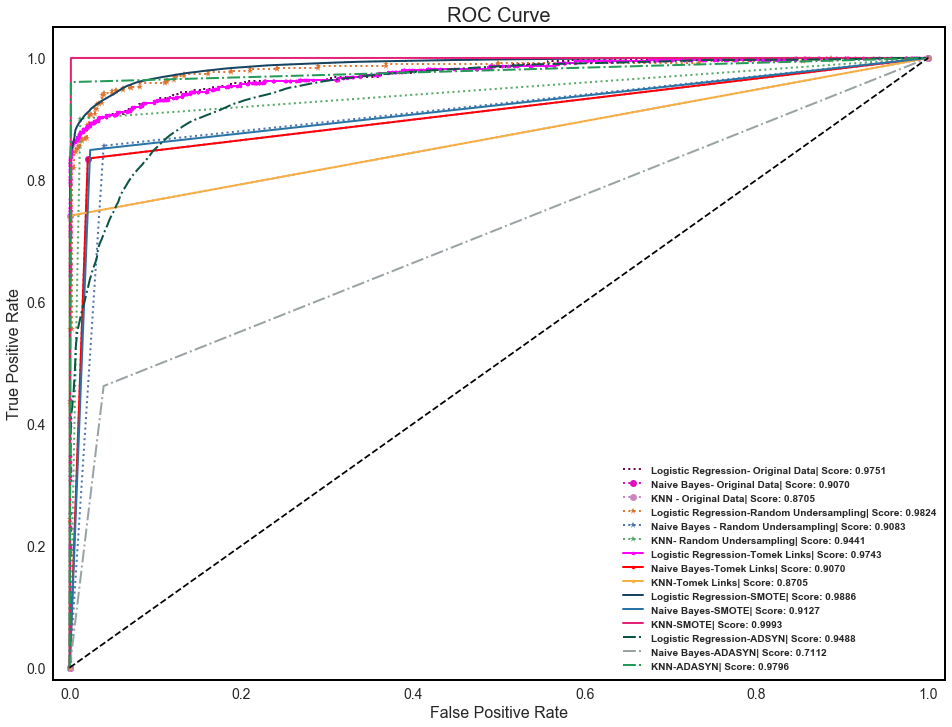

In [417]:
roc_curve_all()

In [409]:
#Original - Logistic Regression
print('Logistic Regression-ORI Score:')
acc_ori_log = accuracy_score(original_ytest, y_pred_ori_log)
print("Accuracy =",acc_ori_log)
auc_ori_log = np.trapz(log_tpr_ori,log_fpr_ori)
print("AUC score =",auc_ori_log)
print(show_metrics(conf_matrix_log_ori))

print('')

#Original - Naive Bayes
print('Naive Bayes-ORI Score:')
acc_ori_nb = accuracy_score(original_ytest, y_pred_ori_nv)
print("Accuracy =",acc_ori_nb)
auc_ori_nb = np.trapz(nb_tpr_ori,nb_fpr_ori)
print("AUC score =",auc_ori_nb)
print(show_metrics(conf_matrix_nv_ori))

print('')
#Original - KNN
print('KNN-ORI Score:')
acc_ori_knn = accuracy_score(original_ytest, y_predknn_ori)
print("Accuracy =",acc_ori_knn)
auc_ori_knn = np.trapz(knn_tpr_ori,knn_fpr_ori)
print("AUC score =",auc_ori_knn)
print(show_metrics(conf_matrix_knn_ori))


print('')

#RUS - Logistic Regression
print('Logistic Regression-RUS Score:')
acc_rus_log = accuracy_score(original_ytest, y_predlog)
print("Accuracy =",acc_rus_log)
auc_rus_log = np.trapz(log_tpr,log_fpr)
print("AUC score =",auc_rus_log)
print(show_metrics(conf_matrix_log_reg))

print('')

#RUS - Naive Bayes
print('Naive Bayes-RUS Score:')
acc_rus_nb = accuracy_score(original_ytest, y_prednv)
print("Accuracy =",acc_rus_nb)
auc_rus_nb = np.trapz(nb_tpr,nb_fpr)
print("AUC score =",auc_rus_nb)
print(show_metrics(conf_matrix_nv))

print('')
#RUS - KNN
print('KNN-RUS Score:')
acc_rus_knn = accuracy_score(original_ytest, y_predknn) #y_predknn_ori
print("Accuracy =",acc_rus_knn)
auc_rus_knn = np.trapz(knn_tpr,knn_fpr)
print("AUC score =",auc_rus_knn)
print(show_metrics(conf_matrix_knn))



print('')

#TL - Logistic Regression
print('Logistic Regression-TL Score:')
acc_tl_log = accuracy_score(original_ytest,y_predlog_tl )
print("Accuracy =",acc_tl_log)
auc_tl_log = np.trapz(log_tpr_tl,log_fpr_tl)
print("AUC score =",auc_tl_log)
print(show_metrics(conf_matrix_log_tl))

print('')

#TL - Naive Bayes
print('Naive Bayes-TL Score:')
acc_tl_nb = accuracy_score(original_ytest, y_prednv_tl)
print("Accuracy =",acc_tl_nb)
auc_tl_nb = np.trapz(nb_tpr_tl,nb_fpr_tl)
print("AUC score =",auc_tl_nb)
print(show_metrics(conf_matrix_nv_tl))

print('')
#TL - KNN
print('KNN-TL Score:')
acc_tl_knn = accuracy_score(original_ytest,y_predknn_tl)
print("Accuracy =",acc_tl_knn)
auc_tl_knn = np.trapz(knn_tpr_tl,knn_fpr_tl)
print("AUC score =",auc_tl_knn)
print(show_metrics(conf_matrix_knn_tl))


print('')

#SMOTE - Logistic Regression
print('Logistic Regression-SMOTE Score:')
acc_sm_log = accuracy_score(original_ytest,y_predlog_sm )
print("Accuracy =",acc_sm_log)
auc_sm_log = np.trapz(log_tpr_sm,log_fpr_sm)
print("AUC score =",auc_sm_log)
print(show_metrics(conf_matrix_log_reg_sm))

print('')

#SMOTE - Naive Bayes
print('Naive Bayes-SMOTE Score:')
acc_sm_nb = accuracy_score(original_ytest, y_pred_nvebayes_sm)
print("Accuracy =",acc_sm_nb)
auc_sm_nb = np.trapz(nb_tpr_sm,nb_fpr_sm)
print("AUC score =",auc_sm_nb)
print(show_metrics(conf_matrix_nv_sm))

print('')
#SMOTE - KNN
print('KNN-SMOTE Score:')
acc_sm_knn = accuracy_score(original_ytest,y_predknn_sm)
print("Accuracy =",acc_sm_knn)
auc_sm_knn = np.trapz(knn_tpr_sm,knn_fpr_sm)
print("AUC score =",auc_sm_knn)
print(show_metrics(conf_matrix_knn_sm))














print('')

#ADASYN- Logistic Regression
print('Logistic Regression-ADASYN Score:')
acc_ada_log = accuracy_score(original_ytest,y_predlog_ada )
print("Accuracy =",acc_ada_log)
auc_ada_log = np.trapz(log_tpr_ada,log_fpr_ada)
print("AUC score =",auc_ada_log)
print(show_metrics(conf_matrix_log_reg_ada))

print('')

#ADASYN - Naive Bayes
print('Naive Bayes-ADASYN Score:')
acc_ada_nb = accuracy_score(original_ytest, y_pred_nvebayes_ada)
print("Accuracy =",acc_ada_nb)
auc_ada_nb = np.trapz(nb_tpr_ada,nb_fpr_ada)
print("AUC score =",auc_ada_nb)
print(show_metrics(conf_matrix_nv_ada))

print('')
#ADASYN- KNN
print('KNN-ADASYN Score:')
acc_ada_knn = accuracy_score(original_ytest,y_predknn_ada)
print("Accuracy =",acc_ada_knn)
auc_ada_knn = np.trapz(knn_tpr_ada,knn_fpr_ada)
print("AUC score =",auc_ada_knn)
print(show_metrics(conf_matrix_knn_ada))







Logistic Regression-ORI Score:
Accuracy = 0.999069555142
AUC score = 0.975111022406
Precision      =     0.817
Recall         =     0.592
Specificity    =     0.001
F1_score       =     0.686
None

Naive Bayes-ORI Score:
Accuracy = 0.977476212212
AUC score = 0.906963165403
Precision      =     0.059
Recall         =     0.806
Specificity    =     0.001
F1_score       =     0.110
None

KNN-ORI Score:
Accuracy = 0.999455777536
AUC score = 0.870521004948
Precision      =     0.935
Recall         =     0.735
Specificity    =     0.001
F1_score       =     0.823
None

Logistic Regression-RUS Score:
Accuracy = 0.970927987079
AUC score = 0.982418718893
Precision      =     0.052
Recall         =     0.929
Specificity    =     0.002
F1_score       =     0.099
None

Naive Bayes-RUS Score:
Accuracy = 0.974895544398
AUC score = 0.908257384784
Precision      =     0.055
Recall         =     0.847
Specificity    =     0.001
F1_score       =     0.104
None

KNN-RUS Score:
Accuracy = 0.984867104385
A